<h1>United Kingdom Road Accidents</h1>

<h3>________________________________________________________________________________________________________________________</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats import f_oneway

In [3]:
accident_df=pd.read_csv('dataset\\accident_data.csv')

In [4]:
accident_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
accident_df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [6]:
accident_df['Latitude']= accident_df['Latitude'].fillna(accident_df['Latitude'].mode()[0])
accident_df['Longitude']= accident_df['Longitude'].fillna(accident_df['Longitude'].mode()[0])
accident_df['Road_Surface_Conditions']= accident_df['Road_Surface_Conditions'].fillna('unknown surface condition')
accident_df['Weather_Conditions']= accident_df['Weather_Conditions'].fillna('unknown weather condition')
accident_df['Road_Type']= accident_df['Road_Type'].fillna('unknown road type')
accident_df['Urban_or_Rural_Area']= accident_df['Urban_or_Rural_Area'].fillna(accident_df['Urban_or_Rural_Area'].mode()[0])

In [7]:
accident_df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [8]:
accident_df['Index']=accident_df['Index'].astype('category')
accident_df['Accident_Severity']=accident_df['Accident_Severity'].astype('category')
accident_df['Light_Conditions']=accident_df['Light_Conditions'].astype('category')
accident_df['District Area']=accident_df['District Area'].astype('category')
accident_df['Road_Surface_Conditions']=accident_df['Road_Surface_Conditions'].astype('category')
accident_df['Road_Type']=accident_df['Road_Type'].astype('category')
accident_df['Urban_or_Rural_Area']=accident_df['Urban_or_Rural_Area'].astype('category')
accident_df['Weather_Conditions']=accident_df['Weather_Conditions'].astype('category')
accident_df['Latitude']=accident_df['Latitude'].astype('category')
accident_df['Longitude']=accident_df['Longitude'].astype('category')
accident_df['Vehicle_Type']=accident_df['Vehicle_Type'].astype('category')
accident_df['Accident Date']= pd.to_datetime (accident_df['Accident Date'], dayfirst =True, errors = 'coerce')

In [9]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [10]:
accident_df['Year']=accident_df['Accident Date'].dt.year

In [11]:
accident_df['Month']=accident_df['Accident Date'].dt.month

In [12]:
accident_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unknown road type,Urban,unknown weather condition,Taxi/Private hire car,2019,8
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unknown road type,Urban,unknown weather condition,Other vehicle,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2


<h1>UniVariate</h1>

<h1>Insight 1</h1>

In [13]:
accident_df['District Area'].value_counts().head()

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Bradford       6212
Sheffield      5710
Name: count, dtype: int64

In [14]:
accident_df['District Area'].value_counts().sum()

np.int64(660679)

<h3>Birmingham District have the most number of accident. It consititute 2.04% of the accidents</h3>

<h1>Insight 2</h1>

In [15]:
accident_df['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds           520885
Raining no high winds         79696
Other                         17150
unknown weather condition     14128
Raining + high winds           9615
Fine + high winds              8554
Snowing no high winds          6238
Fog or mist                    3528
Snowing + high winds            885
Name: count, dtype: int64

<h3>The most common weather conditions during accident is Fine no high winds.</h3>

<h1>Insight 3</h1>

In [16]:
accident_df['Number_of_Casualties'].mean()

np.float64(1.357040257068864)

<h3>1.35 is the average number of casualties per accident</h3>

<h1>Insight 4</h1>

In [17]:
accident_df['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unknown road type       4520
Name: count, dtype: int64

<h3>Single Carriageway is the most common type of road for accidents</h3>

<h1>Insight 5</h1>

In [18]:
accident_df['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h3>The most common vehicle type involve in an accident is a car</h3>

<h1>Insight 6</h1>

In [19]:
accident_df['Number_of_Vehicles'].mode()

0    2
Name: Number_of_Vehicles, dtype: int64

<h3>2 Vehicle are mostly involve in an accident</h3>

<h1>Insight 7</h1>

In [20]:
accident_df['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h3>Most accident happens in Urban Area</h3>

<h1>Insight 8</h1>

In [21]:
accident_df['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<h3>Theres highest number of accident in year 2019</h3>

<h1>Bivariate</h1>

In [22]:
accident_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unknown road type,Urban,unknown weather condition,Taxi/Private hire car,2019,8
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unknown road type,Urban,unknown weather condition,Other vehicle,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2


<h1>Insight 9</h1>

In [23]:
accident_df.groupby('Road_Surface_Conditions')['Number_of_Casualties'].sum()

Road_Surface_Conditions
Dry                          597723
Flood over 3cm. deep           1521
Frost or ice                  24976
Snow                           8008
Wet or damp                  263457
unknown surface condition       883
Name: Number_of_Casualties, dtype: int64

<h3>Despite offering better traction, dry road surfaces account for the highest number of casualties.</h3>

<h1>Insight 10</h1>

In [24]:
accident_df.groupby('Weather_Conditions')['Number_of_Casualties'].sum()

Weather_Conditions
Fine + high winds             11856
Fine no high winds           703445
Fog or mist                    5126
Other                         23236
Raining + high winds          13621
Raining no high winds        112229
Snowing + high winds           1255
Snowing no high winds          8370
unknown weather condition     17430
Name: Number_of_Casualties, dtype: int64

<h3>Most accidents occur in fine no high winds, suggesting that environmental conditions alone are not the main cause of most accidents.</h3>

<h1>Insight 11</h1>

In [25]:
accident_df.groupby('Light_Conditions')['Accident_Severity'].value_counts()

Light_Conditions             Accident_Severity
Darkness - lighting unknown  Slight                 5622
                             Serious                 794
                             Fatal                    68
Darkness - lights lit        Slight               108345
                             Serious               19130
                             Fatal                  1860
Darkness - lights unlit      Slight                 2138
                             Serious                 360
                             Fatal                    45
Darkness - no lighting       Slight                28651
                             Serious                7174
                             Fatal                  1612
Daylight                     Slight               419045
                             Serious               60759
                             Fatal                  5076
Name: count, dtype: int64

<h3>Accidents occurring in daylight tend to be more severe</h3>

<h1>Insight 12</h1>

In [26]:
accident_df[accident_df['Accident_Severity'] == 'Fatal']['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      6577
Van / Goods 3.5 tonnes mgw or under       467
Motorcycle over 500cc                     339
Bus or coach (17 or more pass seats)      325
Goods 7.5 tonnes mgw and over             216
Motorcycle 125cc and under                189
Taxi/Private hire car                     155
Motorcycle over 125cc and up to 500cc     105
Motorcycle 50cc and under                  95
Other vehicle                              70
Goods over 3.5t. and under 7.5t            67
Minibus (8 - 16 passenger seats)           29
Agricultural vehicle                       21
Pedal cycle                                 6
Data missing or out of range                0
Ridden horse                                0
Name: count, dtype: int64

<h3>Cars are involved in the highest number of fatal accidents.</h3>

<h1>Insight 13</h1>

In [27]:
 accident_df['Number_of_Vehicles'].corr(accident_df['Number_of_Casualties'])

np.float64(0.22888886126927557)

<h3> When the number of vehicles involved in an accident increases, the number of casualties also tends to increase. </h3>

<h1>Insight 14</h1>

In [28]:
accident_df[accident_df['Accident_Severity'] == 'Fatal']['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                          5788
Wet or damp                  2620
Frost or ice                  193
Snow                           35
Flood over 3cm. deep           23
unknown surface condition       2
Name: count, dtype: int64

<h3>Dry road conditions have the highest number of fatal accidents.</h3>

<h1>Insight 15</h1>

In [29]:
accident_df.groupby('Year')['Number_of_Casualties'].sum()

Year
2019    247780
2020    230905
2021    222146
2022    195737
Name: Number_of_Casualties, dtype: int64

<h3>The year 2019 recorded the highest number of casualties.</h3>

<h1>Insight 16</h1>

In [30]:
fatal_accidents = accident_df[accident_df['Accident_Severity'] == 'Fatal']
fatal_counts = fatal_accidents.groupby(['Road_Type', 'Weather_Conditions']).size()
fatal_counts.sort_values(ascending=False).head(1)

Road_Type           Weather_Conditions
Single carriageway  Fine no high winds    5375
dtype: int64

<h3>Most fatal accidents happen on single carriageways when the weather is fine with no strong winds. This suggests that accidents are likely caused by factors like speeding, reckless driving, or road conditions rather than bad weather.</h3>

<h1>Insight 17</h1>

In [31]:
accident_df.groupby(['Urban_or_Rural_Area', 'Number_of_Vehicles'])['Number_of_Casualties'].mean()


Urban_or_Rural_Area  Number_of_Vehicles
Rural                1                      1.269725
                     2                      1.486574
                     3                      1.825630
                     4                      2.132179
                     5                      2.473944
                     6                      2.810127
                     7                      3.392857
                     8                      4.009901
                     9                      3.673913
                     10                     3.500000
                     11                     4.125000
                     12                     2.285714
                     13                     6.600000
                     14                     5.444444
                     15                     5.000000
                     16                     8.500000
                     19                    13.000000
                     28                    16.000000
      

<h3>In rural areas, accidents involving 28 vehicles lead to have the most number of casualties</h3>

<h1>Insight 18</h1>

In [32]:
accident_df['Month'].value_counts()

Month
11    60424
10    59580
7     57445
6     56481
9     56455
5     56352
3     54086
8     53913
1     52872
12    51836
4     51744
2     49491
Name: count, dtype: int64

<h3>November has the highest number of accidents. This could be due to increased travel, holiday rush, or changing weather conditions affecting road safety.</h3>

<h1>Insight 19</h1>

In [33]:
accident_df.groupby(['Weather_Conditions', 'Vehicle_Type']).size().sort_values(ascending=False).head(1)

Weather_Conditions  Vehicle_Type
Fine no high winds  Car             392668
dtype: int64

<h3> Cars have the highest number of accidents during fine no high winds weather. </h3>

<h1>Insight 20</h1>

In [34]:
accident_df[accident_df['Accident_Severity'] == 'Fatal']['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Rural          5601
Urban          3060
Unallocated       0
Name: count, dtype: int64

<h3>Rural area have the highest number of fatal accidents.</h3>

<h1>DATA VISUALIZATION</h1>

<h1>VISUAL 1 </h1>

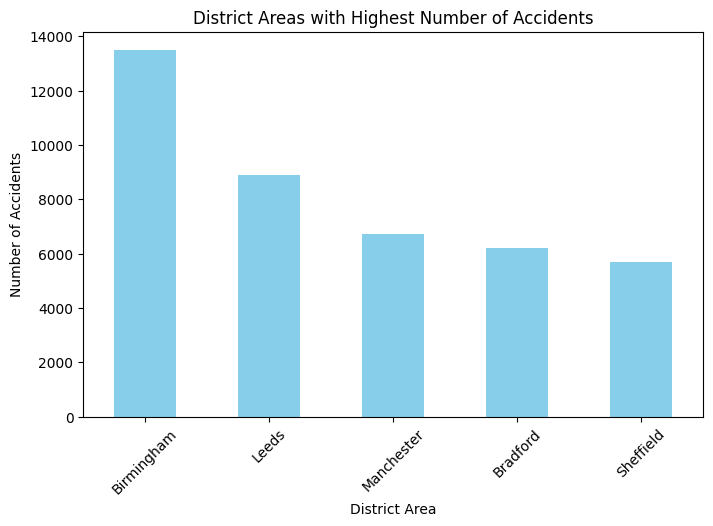

In [35]:
highest_district = accident_df['District Area'].value_counts().head()

plt.figure(figsize=(8, 5))
highest_district.plot(kind='bar', color='skyblue')

plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.title('District Areas with Highest Number of Accidents')
plt.xticks(rotation=45)

plt.show()

<h1>VISUAL 2</h1>

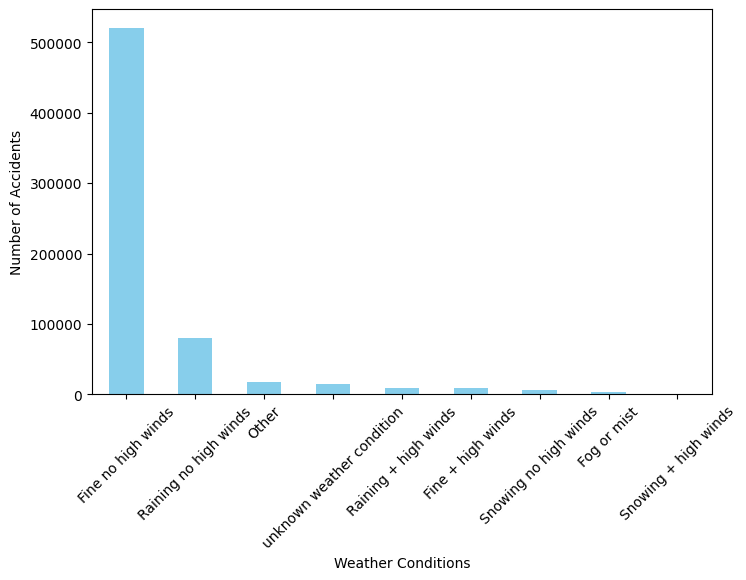

In [36]:
weather_counts = accident_df['Weather_Conditions'].value_counts()
plt.figure(figsize=(8, 5))
weather_counts.plot(kind='bar', color='skyblue')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather Conditions')
plt.xticks(rotation=45)
plt.show()

<h1>VISUAL 4</h1>

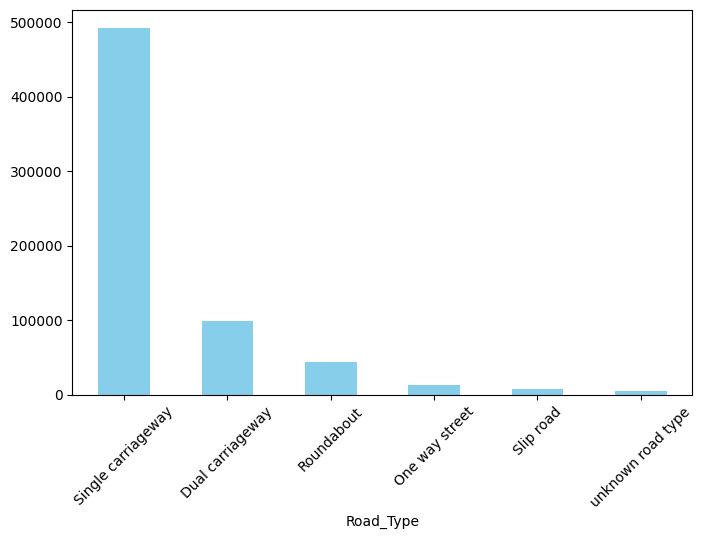

In [37]:
road_type = accident_df['Road_Type'].value_counts()
plt.figure(figsize=(8, 5))
road_type.plot(kind='bar', color='skyblue')
plt.xticks(rotation=45)
plt.show()

<h1>VISUAL 5</h1>

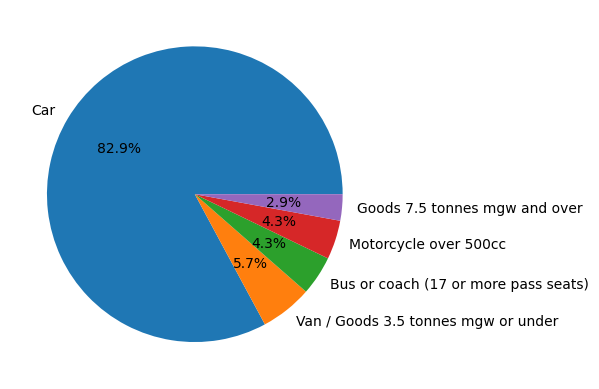

In [39]:

vehicle_type = accident_df['Vehicle_Type'].value_counts().head(5)
plt.pie(vehicle_type, labels=vehicle_type.index, autopct='%1.1f%%')
plt.show()


<h1>VISUAL 7</h1>

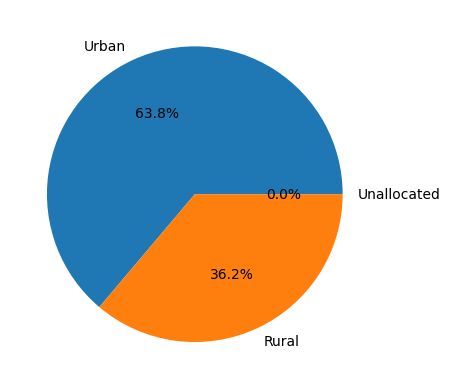

In [40]:
urban_rural = accident_df['Urban_or_Rural_Area'].value_counts()
plt.pie(urban_rural, labels=urban_rural.index, autopct='%1.1f%%')
plt.show()

<h1>VISUAL 8</h1>

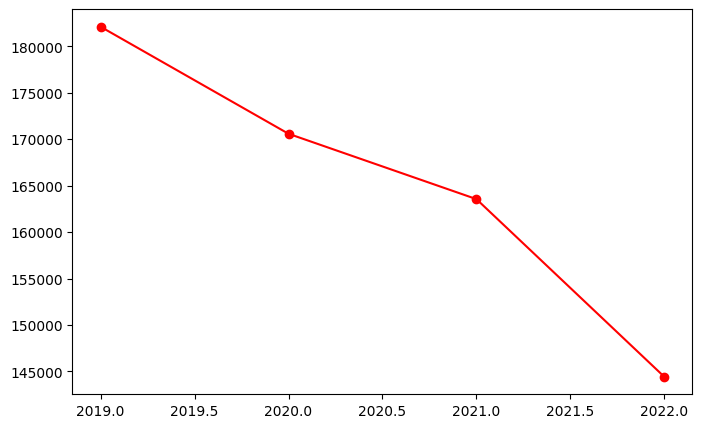

In [41]:
year = accident_df['Year'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.plot(year.index, year.values, marker='o', linestyle='-', color='red')
plt.show()

<h1>VISUAL 9</h1>

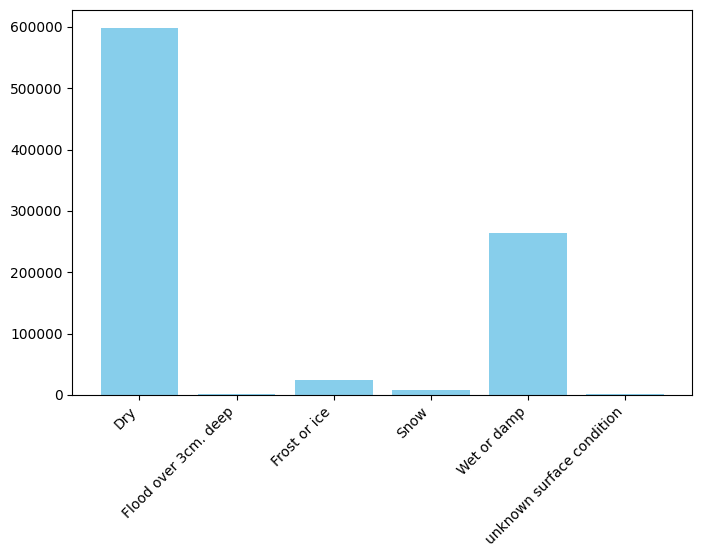

In [42]:
casualties_road = accident_df.groupby('Road_Surface_Conditions')['Number_of_Casualties'].sum()
plt.figure(figsize=(8, 5))
plt.bar(casualties_road.index, casualties_road.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.show()

<h1>VISUAL 10</h1>

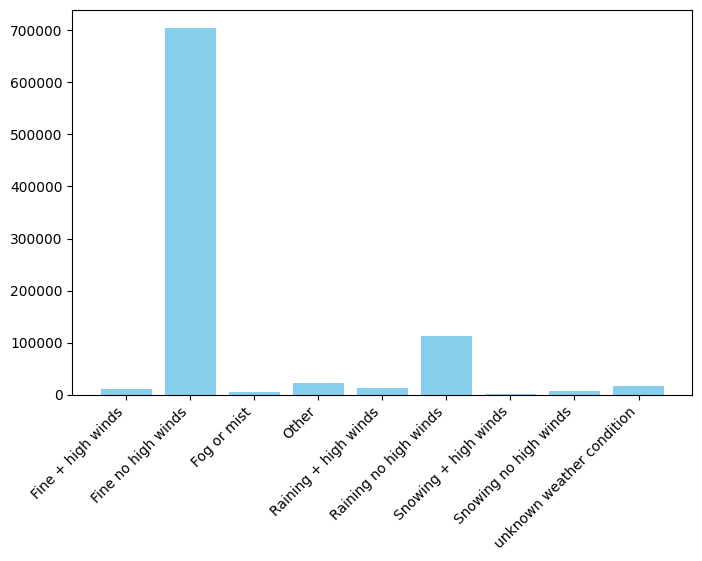

In [43]:
casualties_weather = accident_df.groupby('Weather_Conditions')['Number_of_Casualties'].sum()
plt.figure(figsize=(8, 5))
plt.bar(casualties_weather.index, casualties_weather.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.show()

<h1>VISUAL 11</h1>

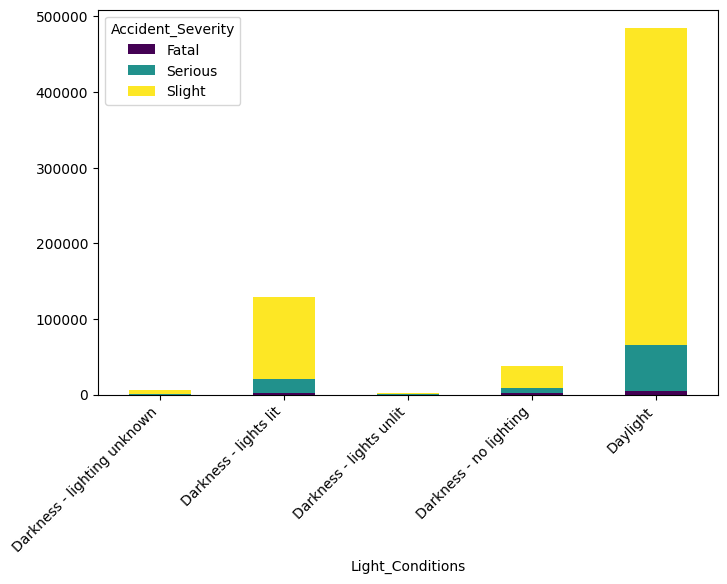

In [44]:
severity_light = accident_df.groupby('Light_Conditions')['Accident_Severity'].value_counts().unstack()
severity_light.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

<h1>VISUAL 12</h1>

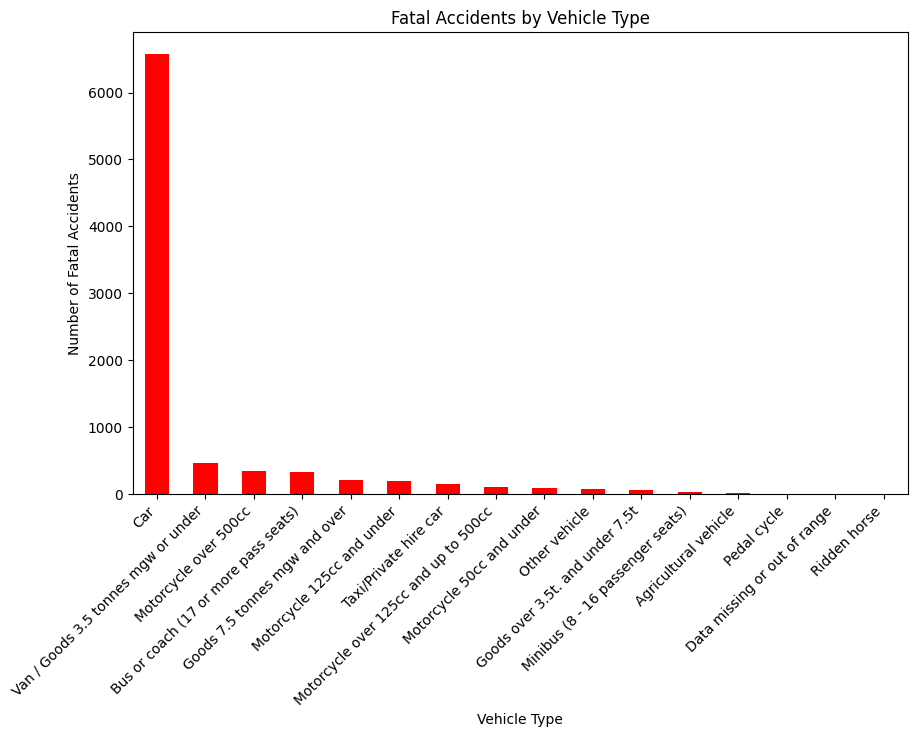

In [46]:
fatal_vehicle_counts = accident_df[accident_df['Accident_Severity'] == 'Fatal']['Vehicle_Type'].value_counts()
plt.figure(figsize=(10, 6))
fatal_vehicle_counts.plot(kind='bar', color='red')
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Fatal Accidents")
plt.title("Fatal Accidents by Vehicle Type")
plt.xticks(rotation=45, ha='right')
plt.show()

<h1>VISUAL 13</h1>

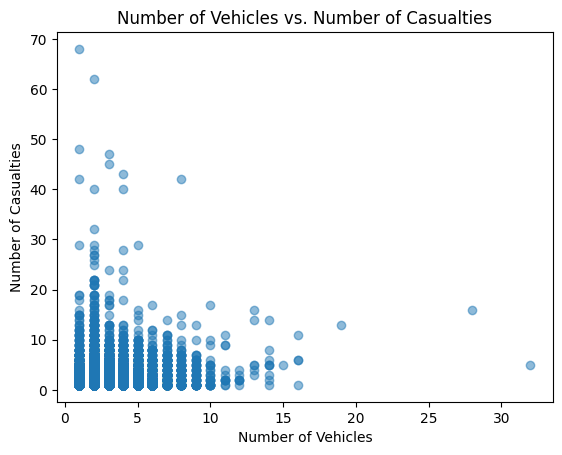

In [47]:
plt.scatter(accident_df['Number_of_Vehicles'], accident_df['Number_of_Casualties'], alpha=0.5)
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.title("Number of Vehicles vs. Number of Casualties")
plt.show()

<h1>VISUAL 14</h1>

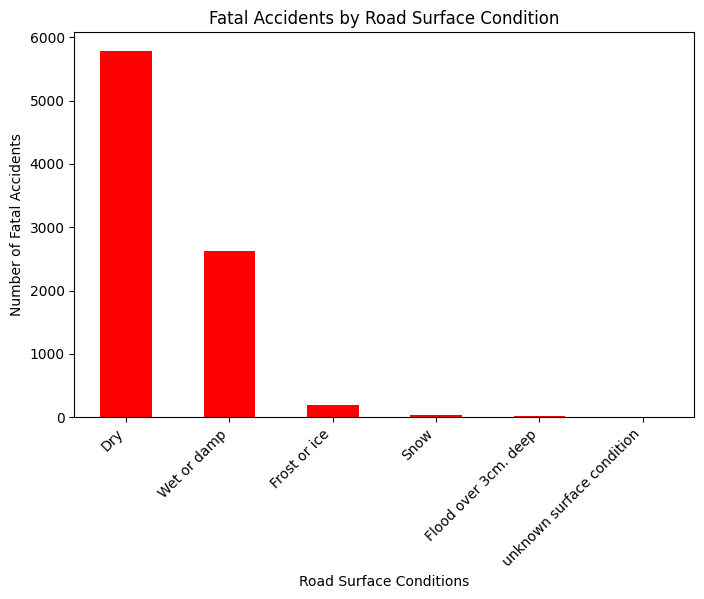

In [49]:
fatal_conditions = accident_df[accident_df['Accident_Severity'] == 'Fatal']['Road_Surface_Conditions'].value_counts()
plt.figure(figsize=(8, 5))
fatal_conditions.plot(kind='bar', color='red')
plt.xlabel("Road Surface Conditions")
plt.ylabel("Number of Fatal Accidents")
plt.title("Fatal Accidents by Road Surface Condition")
plt.xticks(rotation=45, ha='right')
plt.show()

<h1>Visual 15 </h1>

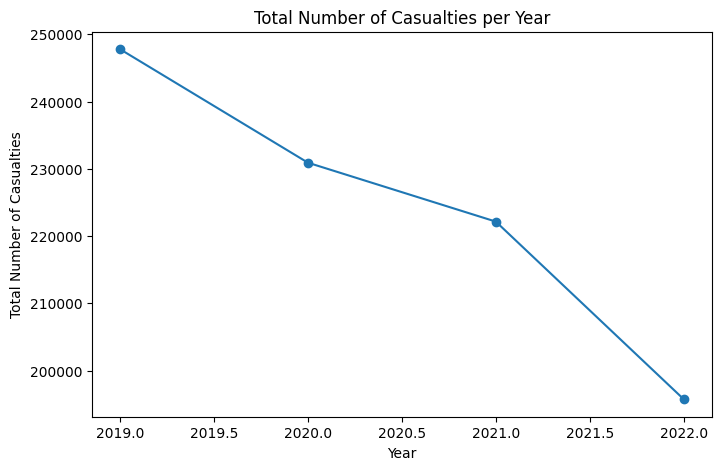

In [51]:
year_casualties = accident_df.groupby('Year')['Number_of_Casualties'].sum()
plt.figure(figsize=(8, 5))
plt.plot(year_casualties.index, year_casualties.values, marker='o', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Total Number of Casualties")
plt.title("Total Number of Casualties per Year")

plt.show()

<h1> Visual 16 </h1>

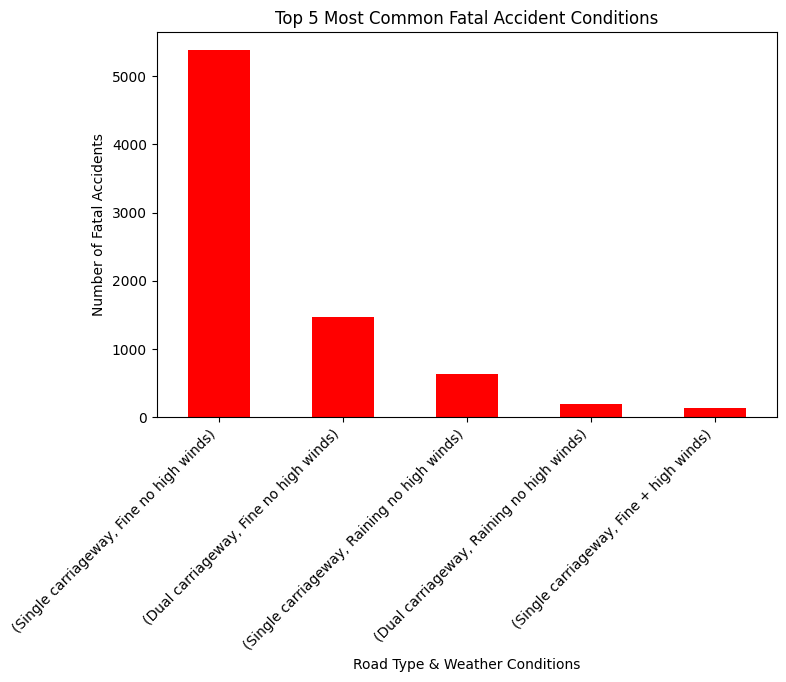

In [52]:
fatal_conditions = fatal_counts.sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
fatal_conditions.plot(kind='bar', color='red')
plt.xlabel("Road Type & Weather Conditions")
plt.ylabel("Number of Fatal Accidents")
plt.title("Top 5 Most Common Fatal Accident Conditions")
plt.xticks(rotation=45, ha='right')

plt.show()

<h1> Visual 17 </h1>

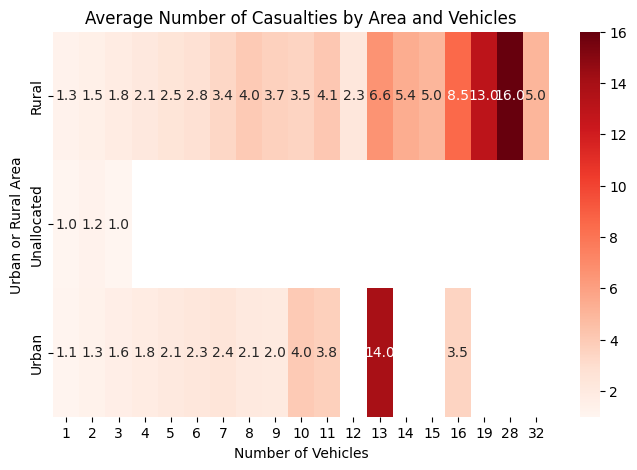

In [53]:
casualties_heatmap = accident_df.groupby(['Urban_or_Rural_Area', 'Number_of_Vehicles'])['Number_of_Casualties'].mean().unstack()
plt.figure(figsize=(8, 5))
sns.heatmap(casualties_heatmap, cmap="Reds", annot=True, fmt=".1f")
plt.xlabel("Number of Vehicles")
plt.ylabel("Urban or Rural Area")
plt.title("Average Number of Casualties by Area and Vehicles")
plt.show()

<h1> Visual 19 </h1>

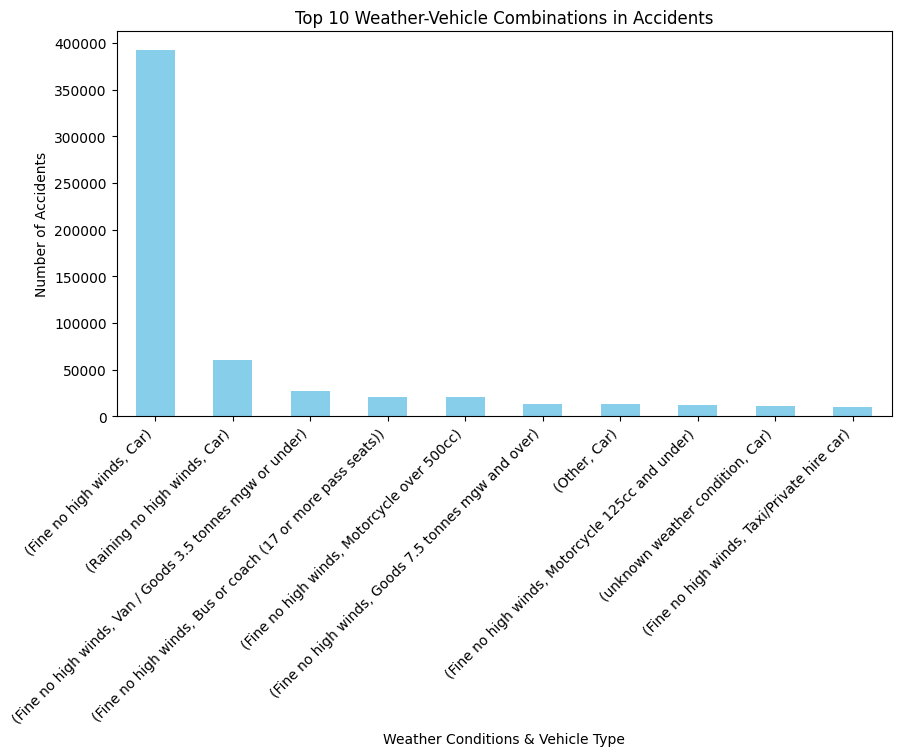

In [58]:
top_10_weather = accident_df.groupby(['Weather_Conditions', 'Vehicle_Type']).size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_10_weather.plot(kind='bar', color='skyblue')

plt.xlabel("Weather Conditions & Vehicle Type")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Weather-Vehicle Combinations in Accidents")
plt.xticks(rotation=45, ha='right')

plt.show()

<h1>Visual 20</h1>

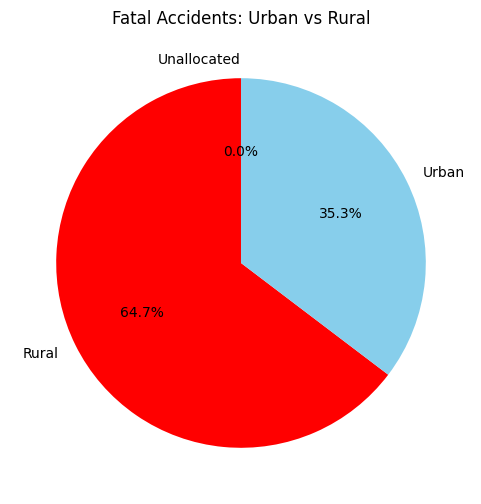

In [60]:
fatal_areas = accident_df[accident_df['Accident_Severity'] == 'Fatal']['Urban_or_Rural_Area'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fatal_areas, labels=fatal_areas.index, autopct='%1.1f%%', colors=['red', 'skyblue'], startangle=90)
plt.title("Fatal Accidents: Urban vs Rural")
plt.show()
